### Logistic Regression

# <b> <u>Introduction: What is Logistic Regression? </u></b>

### Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

### **Logistic regression** is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

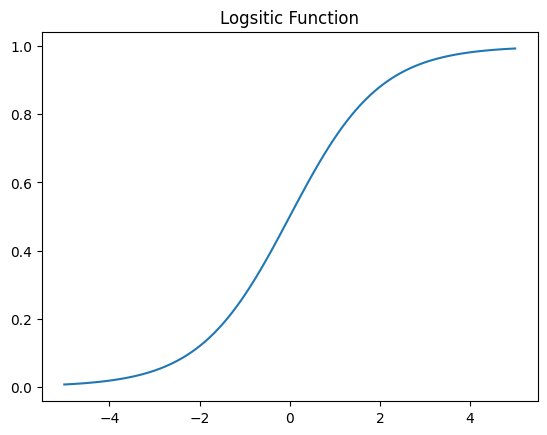

In [2]:
#visualizing logistic curve
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.title('Logsitic Function')
plt.show()

### The **logistic function** has some nice properties. The y-value represents the probability and it is always bounded between 0 and 1, which is want we wanted for probabilities. For an x value of 0 you get a 0.5 probability. Also as you get more positive x value you get a higher probability, on the other hand, a more negative x value results in a lower probability.

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Classroom/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [4]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
df = data.copy()

### That's a lot of columns, to simplify our experiment we will only use 2 features **tenure** and **MonthlyCharges** and the target would be **Churn**  of course. Let us do a simple EDA and visualization on our features and target.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

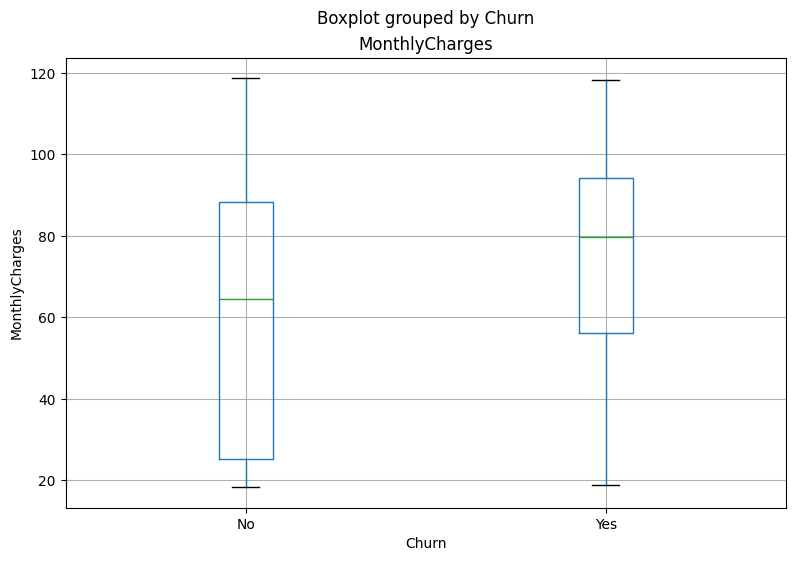

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

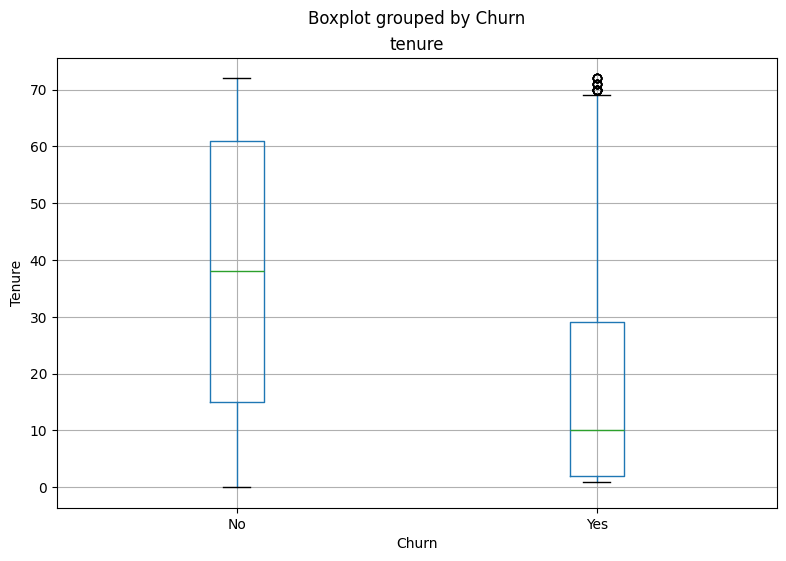

In [8]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

## <b> Insights from our simple EDA: </b>
* ### We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
* ### There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.

### Before we start predicting, an important step to do is to convert our **Churn** feature, which is a string, into integer. *Yes* will be converted to 1 and *No* will be converted to 0. We will name this new columns a "class".

In [9]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [10]:
df.shape

(7043, 22)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [12]:
y_train.value_counts()

,count
class,
0,4133
1,1501


In [13]:
y_test.value_counts()

,count
class,
0,1041
1,368


In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
clf.coef_

array([[-0.05646759,  0.03315394]])

In [16]:
# Get the model coefficients
clf.coef_

array([[-0.05646759,  0.03315394]])

In [17]:
clf.intercept_

array([-1.77408798])

In [18]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [19]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [20]:
test_preds

array([[0.71451461, 0.28548539],
       [0.78522736, 0.21477264],
       [0.53064661, 0.46935339],
       ...,
       [0.77288764, 0.22711236],
       [0.71618079, 0.28381921],
       [0.57739896, 0.42260104]])

In [21]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [22]:
test_preds

array([0.28548539, 0.21477264, 0.46935339, ..., 0.22711236, 0.28381921,
       0.42260104])

In [23]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [24]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [26]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


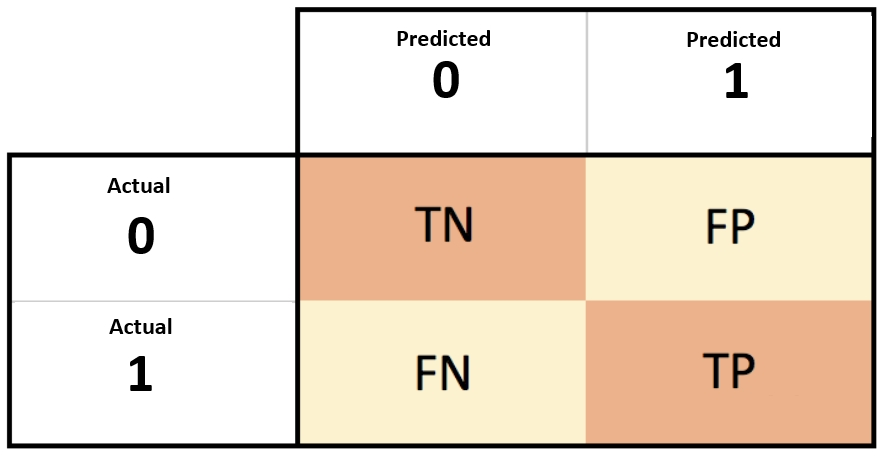

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

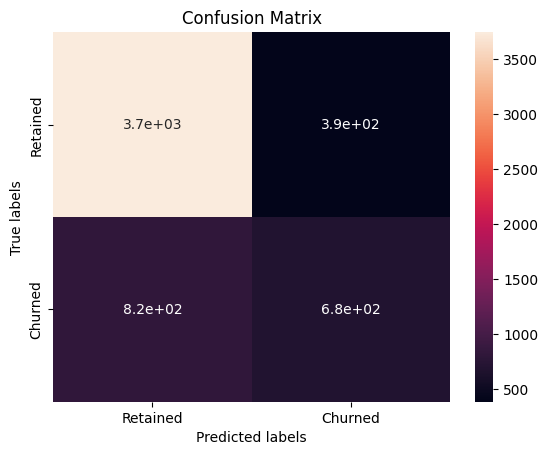

In [27]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

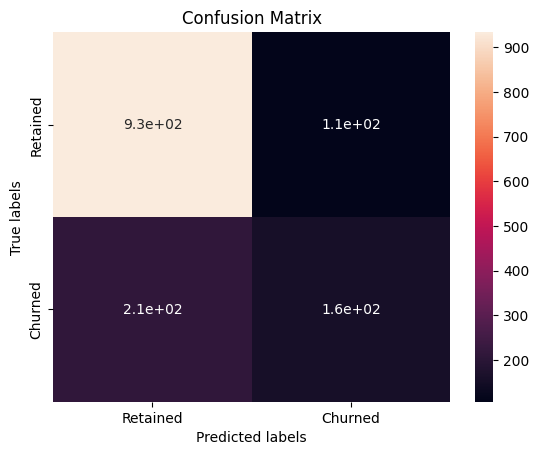

In [28]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

####Implementing Cross-validated Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [30]:
logistic = LogisticRegression()

In [31]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.3s


[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.1s


In [32]:
scores['train_accuracy']

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [33]:
scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [34]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [35]:
for model in scores['estimator']:
    print(model.coef_)

[[-0.05617791  0.032938  ]]
[[-0.05562275  0.03215852]]
[[-0.05820331  0.03454823]]
[[-0.05711871  0.03362493]]
[[-0.05530045  0.03257423]]
